## Q1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.Q1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

## Meta-Data of the Pima Indian Diabetes Dataset:

This dataset contains information about the following attributes of 768 Pima Indian Women collected in 1990 to predict the occurence of diabetes mellitus:

preg: number of times pregnant, discrete variable
plas: plasma glucose concentration a 2 hours in an oral glucose tolerance test, continuous variable
pres: diastolic blood pressure (mm Hg), continuous variable
skin: triceps skin fold thickness (mm), continuous variable
insu: 2-hour serum insulin (mu U/ml), continuous variable
mass: body mass index (weight in kg/(height in m)^2), continuous variable
pedi: diabetes pedigree function, continuous variable
age: in years, continuous variable
test: 0: tested negative for diabetes, 1: tested positive for diabetes, categorical variable, binary classification

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [2]:
df = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 8 Logistic Regression/pima_indians_diabetes.csv")

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,test
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
## henece glucose plasmana are zero thts why we are droping 0 Value

df = df[df.plas!=0]
df = df[df.pres!=0]
df = df[df.skin!=0]
df = df[df.insu!=0]
df = df[df.mass!=0]

In [6]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,test
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Q2. Compute mean & standard deviation, tabulate and visualize the age of the patients.

In [7]:
df.age.mean()

30.864795918367346

In [8]:
df.age.std()

10.200776534263372

In [9]:
bins = [20,30,40,50,60,70,80,90]

df['age_category'] = pd.cut(df.age,bins)

In [10]:
df.age_category.value_counts()

(20, 30]    248
(30, 40]     74
(40, 50]     42
(50, 60]     25
(60, 70]      2
(80, 90]      1
(70, 80]      0
Name: age_category, dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Patients')

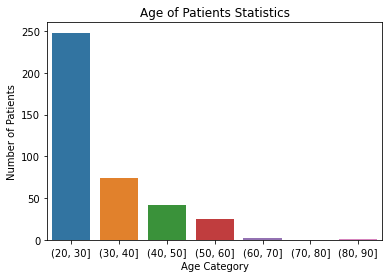

In [11]:
# plotting the age categories of the patients
plt.figure()
sns.countplot(df.age_category)
plt.title('Age of Patients Statistics')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')

Text(0.5, 0, 'Age')

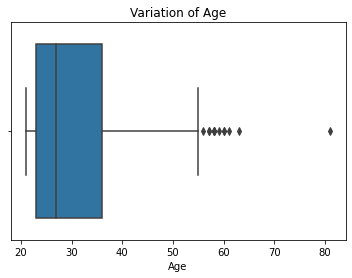

In [12]:
# plotting the distribution of the patients' age
plt.figure()
sns.boxplot(df.age)
plt.title('Variation of Age')
plt.xlabel('Age')

### Q3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [13]:
pd.crosstab(df.test, df.age_category)

age_category,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(80, 90]"
test,,,,,,
0,197,39,18,5,2,1
1,51,35,24,20,0,0


In [14]:
df['bmi_category'] = '' 
df.loc[df.mass<18, 'bmi_category'] = 'underweight'
df.loc[((df.mass>=18) & (df.mass<=25)), 'bmi_category'] = 'healthy'
df.loc[((df.mass>25) & (df.mass<30)), 'bmi_category'] = 'overweight'
df.loc[df.mass>=30, 'bmi_category'] = 'obese'

In [15]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,test,age_category,bmi_category
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]",overweight
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]",obese
6,3,78,50,32,88,31.0,0.248,26,1,"(20, 30]",obese
8,2,197,70,45,543,30.5,0.158,53,1,"(50, 60]",obese
13,1,189,60,23,846,30.1,0.398,59,1,"(50, 60]",obese


In [16]:
pd.crosstab(df.test, df.bmi_category)

bmi_category,healthy,obese,overweight
test,,,
0,44,152,66
1,2,110,18


Text(0, 0.5, 'Number of Patients')

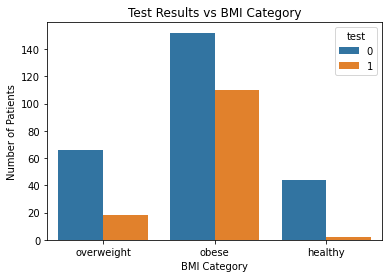

In [17]:
# plotting the test results vs the bmi categories
plt.figure()
sns.countplot(data=df, x='bmi_category', hue='test')
plt.title('Test Results vs BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')

In [20]:
pd.crosstab([df.test,df.bmi_category],df.age_category,margins=True)

#Threeway contrass table

age_category       (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (80, 90]  \
test bmi_category                                                               
0    healthy             36         5         1         2         0         0   
     obese              108        24        17         2         1         0   
     overweight          53        10         0         1         1         1   
1    healthy              1         1         0         0         0         0   
     obese               47        29        17        17         0         0   
     overweight           3         5         7         3         0         0   
All                     248        74        42        25         2         1   

age_category       All  
test bmi_category       
0    healthy        44  
     obese         152  
     overweight     66  
1    healthy         2  
     obese         110  
     overweight     18  
All                392

<Figure size 432x288 with 0 Axes>

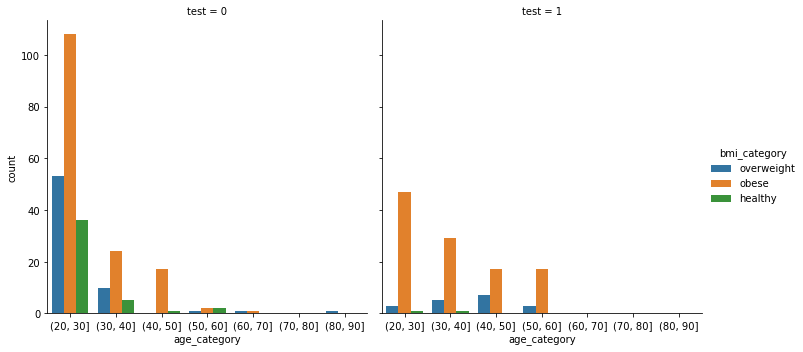

In [21]:
# Relationship of age,BMI of with respect of class

plt.figure()
sns.catplot(data=df,x='age_category',kind='count',hue='bmi_category',col='test')

## Q4 . Tabulate the class label and comment on whether the classes are balanced.

In [22]:
df.test.value_counts()

0    262
1    130
Name: test, dtype: int64

df.columns

### Q5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [24]:
x = df[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = df[['test']]

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=105)

In [30]:
from sklearn.linear_model import LogisticRegression

# build the model
model = LogisticRegression()
model.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [33]:
model.score(x_test,y_test)

0.6949152542372882

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_pred)

cf_matrix

array([[65, 15],
       [21, 17]], dtype=int64)

### Q6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

<AxesSubplot:>

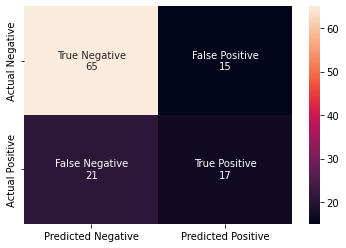

In [37]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2,2)
axylabels = ['Actual Negative', 'Actual Positive']
axxlabels = ['Predicted Negative', 'Predicted Positive']

# plotting the heatmap
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

In [40]:
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

acc = ((tp+tn)/(tp+fn+tn+fp))*100 # accuracy
tpr = (tp/(tp+fn))*100 # true positive rate
tnr = (tn/(tn+fp))*100 # true negative rate

print(str.format('Accuracy: {:.2f}%', acc))
print(str.format('True Positive Rate: {:.2f}%', tpr))
print(str.format('True Negative Rate: {:.2f}%', tnr))

Accuracy: 69.49%
True Positive Rate: 44.74%
True Negative Rate: 81.25%


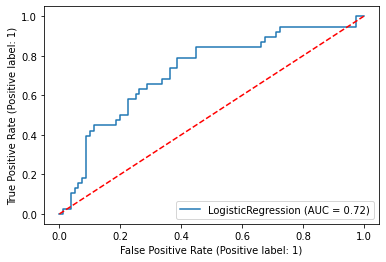

In [41]:
# plotting the roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test)#, pos_label='tested_positive')
plt.plot([0, 1], [0, 1],'r--') # red line is 50%

As we can see, the ROC curve is in between the 45 degree line and the edge, and the Area Under the Curve is 0.72. This means that the probability of a positive instance ranking higher than a negative instance is 0.72, and hence the model performs moderately.